<a href="https://colab.research.google.com/github/thongle28625/ttnt/blob/main/2001230937_LeQuocThong_Buoi5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bài 1: Cài đặt thuật toán K-Mean**

**1. K-Means Là Gì?**

- **K-Means** là một thuật toán học máy không giám sát (Unsupervised Learning) được sử dụng để giải quyết bài toán phân cụm (Clustering).
- **Mục tiêu**: Phân chia $N$ điểm dữ liệu thành $K$ nhóm (cụm) riêng biệt, sao cho các điểm trong cùng một cụm có sự tương đồng cao hơn các điểm ở cụm khác.
- **Nguyên tắc hoạt động**: Độ tương đồng được đo bằng khoảng cách (thường là khoảng cách Euclidean) từ một điểm dữ liệu đến tâm cụm (centroid). Thuật toán tìm cách tối thiểu hóa tổng bình phương khoảng cách từ các điểm đến tâm cụm gần nhất của chúng.

**2. Ứng dụng**

 **K-Means được sử dụng rộng rãi trong nhiều lĩnh vực**:

**1) Phân khúc Khách hàng (Customer Segmentation)**:

- Chia khách hàng thành các nhóm dựa trên hành vi mua sắm, nhân khẩu học hoặc giá trị trọn đời (LTV) để các đội marketing có thể nhắm mục tiêu chiến dịch chính xác hơn.

**2) Xử lý Hình ảnh (Image Processing)**:**văn bản in đậm**

- **Nén màu (Color Quantization)**: Giảm số lượng màu trong một hình ảnh trong khi vẫn giữ được chất lượng thị giác chấp nhận được. K là số lượng màu cuối cùng.

**3) Hệ thống Gợi ý (Recommender Systems)**:

- Phân cụm người dùng có sở thích tương tự nhau để gợi ý sản phẩm/nội dung mà những người khác trong cùng cụm đã thích.

**4) Phát hiện Bất thường (Anomaly Detection)**:

- Phân cụm dữ liệu, sau đó các điểm nằm rất xa tâm cụm (hoặc không thuộc cụm nào) có thể được coi là điểm bất thường hoặc gian lận.

**3. Thuật Toán K-Means**

Thuật toán K-Means hoạt động thông qua một quá trình lặp đi lặp lại gồm hai bước chính cho đến khi các tâm cụm không còn thay đổi đáng kể nữa (hội tụ).

**Các Bước Thực Hiện**:

**1) Bước Khởi tạo (Initialization)**:

- Chọn trước số cụm $K$ (ví dụ: $K=3$).Chọn ngẫu nhiên $K$ điểm dữ liệu trong tập dữ liệu làm các tâm cụm (Centroids) ban đầu.

**2) Bước Gán nhãn (Assignment/E-step)**:

- Gán mỗi điểm dữ liệu vào tâm cụm gần nhất. Khoảng cách thường dùng là khoảng cách Euclidean.$label(x_i) = \arg\min_{c_j \in C} ||x_i - c_j||^2$

**3) Bước Cập nhật (Update/M-step)**:

- Tính toán lại vị trí mới của mỗi tâm cụm bằng cách lấy giá trị trung bình của tất cả các điểm dữ liệu đã được gán vào cụm đó.$c_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$ (Với $C_j$ là tập hợp các điểm thuộc cụm $j$).

**4) Bước Kiểm tra Hội tụ**:

- Lặp lại Bước 2 và Bước 3 cho đến khi vị trí của các tâm cụm không thay đổi hoặc thay đổi dưới một ngưỡng xác định (hoặc đạt đến số lần lặp tối đa).

Hiển thị dữ liệu đã tạo...


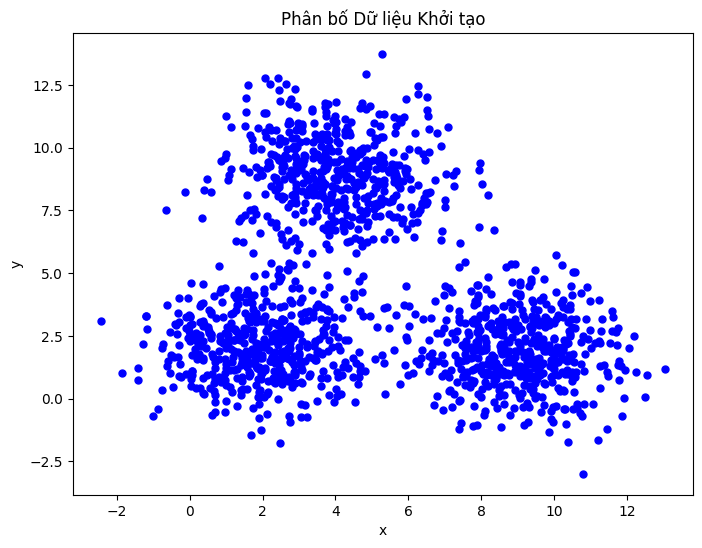

Tọa độ khởi tạo ban đầu của các tâm cụm:
 [[0.8384786  2.29042136]
 [7.24245777 0.19610034]
 [1.98597587 1.72135009]]


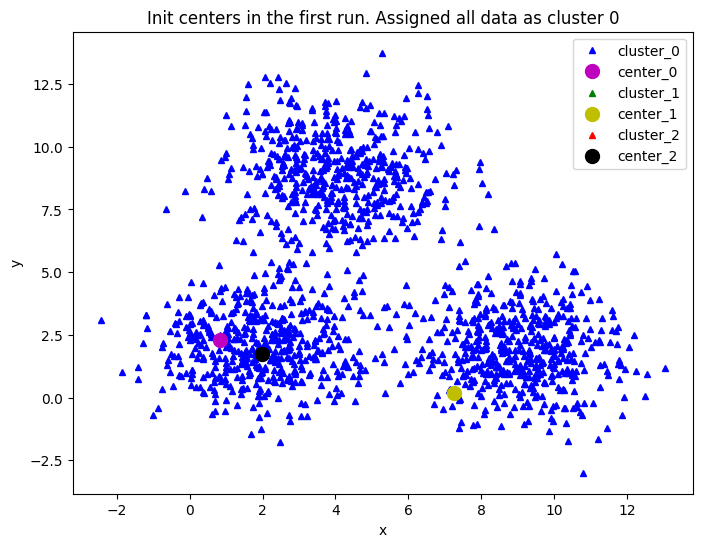

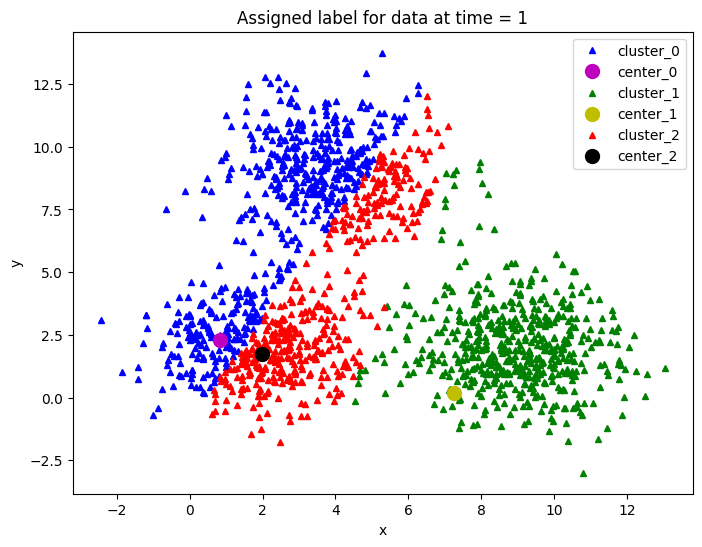

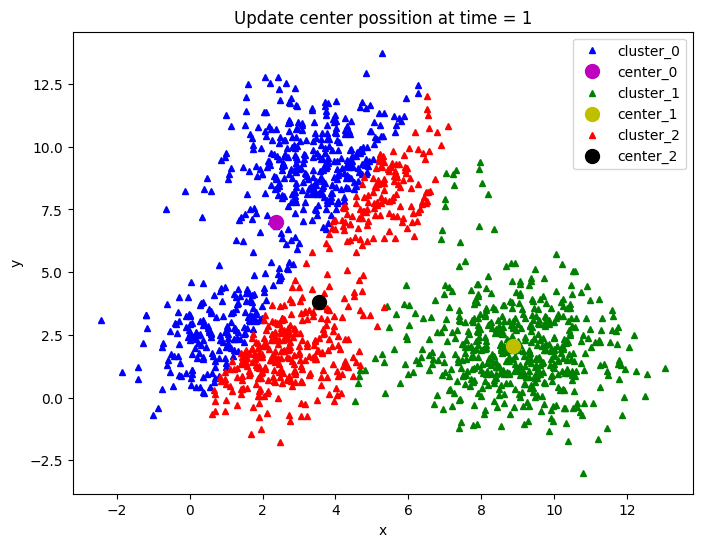

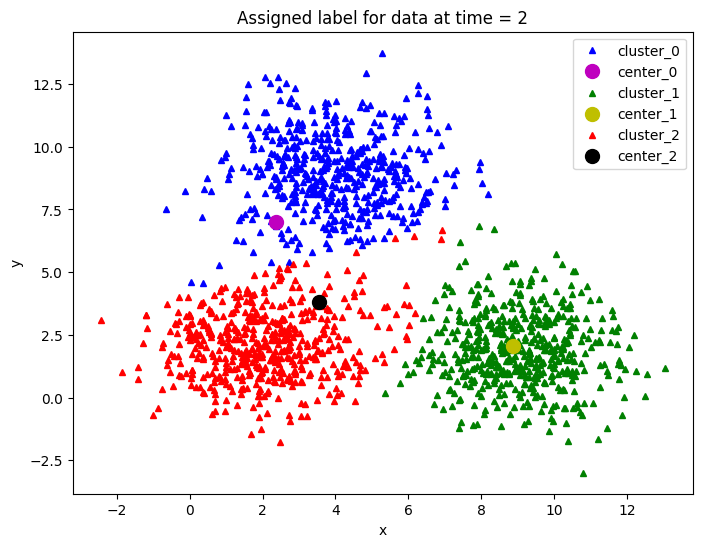

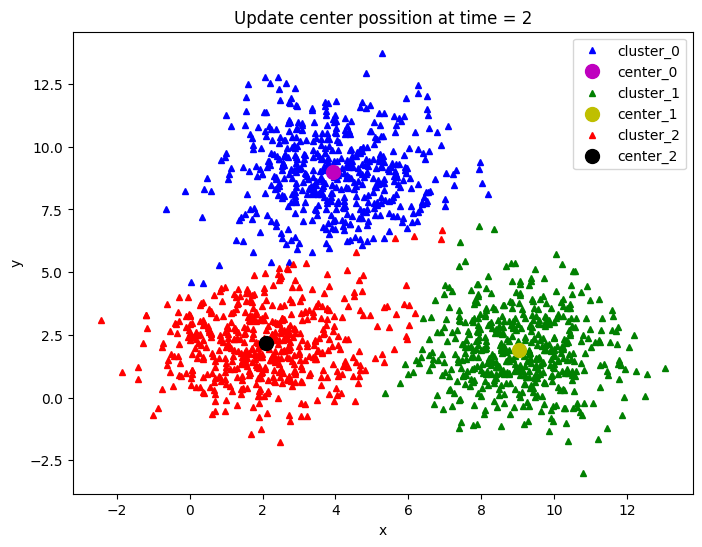

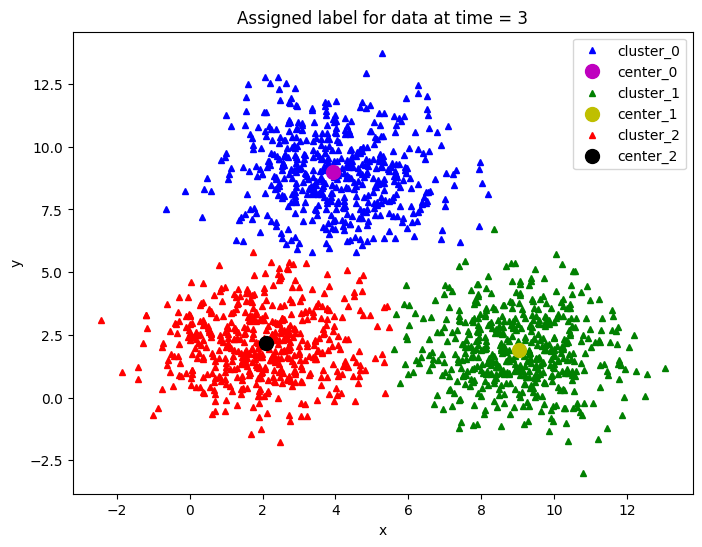

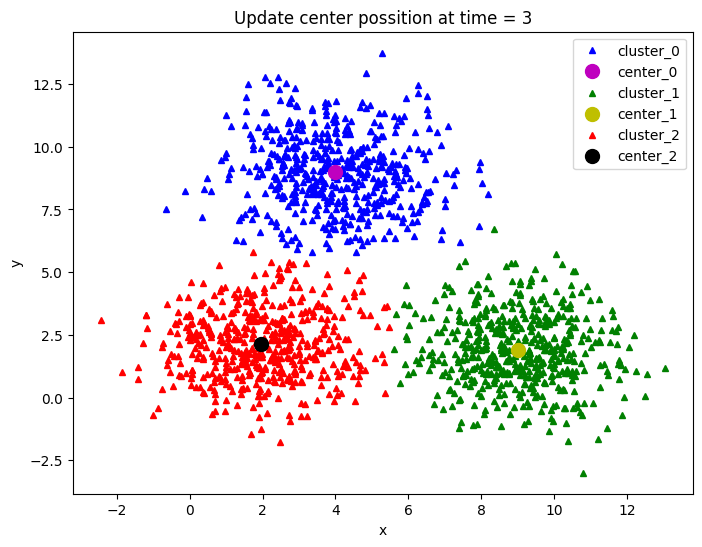

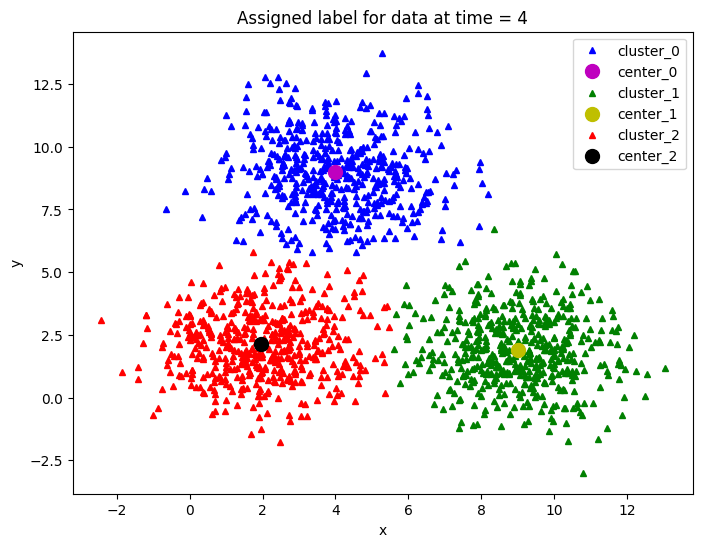


✨ Done! Kmeans has converged after 3 times
Tâm cụm cuối cùng:
 [[3.99197423 8.99957076]
 [8.99953819 1.91448751]
 [1.9682975  2.14309591]]


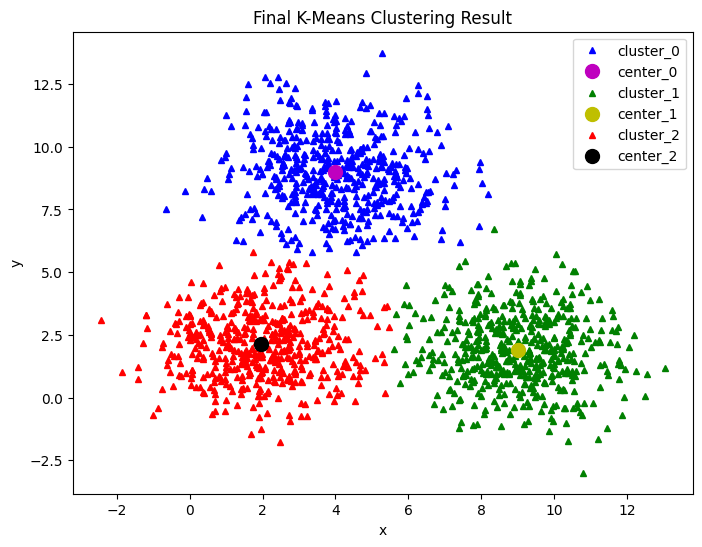

In [1]:
import numpy as np # Thư viện tính toán toán học
import matplotlib.pyplot as plt # Visualize data sử dụng đồ thị
from scipy.spatial.distance import cdist # Hỗ trợ tính khoảng cách

# --- Bước 2: Khởi tạo 500 điểm dữ liệu xung quanh 3 tâm cụm (2, 2), (9, 2) và (4, 9)
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0) # Tập dữ liệu cuối cùng

# --- Bước 3: Xem phân bố của dữ liệu vừa tạo
print("Hiển thị dữ liệu đã tạo...")
plt.figure(figsize=(8, 6))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phân bố Dữ liệu Khởi tạo')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.show()


# --- Bước 4: Viết hàm khởi tạo n_cluster=3 tâm cụm
def kmeans_init_centers(X, n_cluster):
    # Chọn ngẫu nhiên k điểm từ tập dữ liệu làm tâm cụm ban đầu
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

# --- Bước 5: Hàm xác định nhãn (gán điểm dữ liệu vào tâm cụm gần nhất)
def kmeans_predict_labels(X, centers):
    # Tính khoảng cách từ mỗi điểm dữ liệu đến mỗi tâm cụm
    D = cdist(X, centers)
    # Trả về chỉ số (index) của tâm cụm gần nhất
    return np.argmin(D, axis = 1)

# --- Bước 6: Hàm cập nhật lại vị trí của các tâm cụm
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        # Lấy tất cả các điểm được gán cho cụm k
        Xk = X[labels == k, :]
        # Cập nhật tâm cụm bằng giá trị trung bình của các điểm trong cụm đó
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# --- Bước 7: Hàm Kiểm tra tính hội tụ
def kmeans_has_converged(centers, new_centers):
    # Kiểm tra xem hai tập hợp tâm cụm (cũ và mới) có giống nhau không
    # Dùng tuple và set để so sánh các mảng
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

# --- Bước 8: Hàm vẽ lên đồ thị để quan sát kết quả
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.figure(figsize=(8, 6))
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị

    # Danh sách màu hỗ trợ cho k=3
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i] # Lấy dữ liệu của cụm i
        # Vẽ các điểm dữ liệu của cụm i (dùng tam giác '^')
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4, label='cluster_' + str(i))

        # Vẽ tâm cụm i (dùng hình tròn 'o') - dùng màu khác để phân biệt tâm
        # Dùng i+4 để chọn màu khác cho tâm so với cụm
        plt.plot(centers[i][0], centers[i][1], plt_colors[i + 4] + 'o', markersize=10, label='center_' + str(i))

    plt.legend() # Hiện bảng chú thích
    plt.show()

# --- Bước 9: Toàn bộ thuật toán k-means
def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    while True:
        # Gán nhãn mới cho các điểm
        labels = kmeans_predict_labels(X, centers)

        # Trực quan hóa kết quả gán nhãn
        kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))

        # Cập nhật vị trí tâm cụm
        new_centers = kmeans_update_centers(X, labels, n_cluster)

        # Kiểm tra điều kiện dừng
        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers

        # Trực quan hóa kết quả cập nhật tâm (sau khi gán nhãn và trước khi kiểm tra hội tụ ở vòng lặp sau)
        # Lưu ý: Hình ảnh này hiển thị tâm MỚI, sẽ được sử dụng trong lần lặp tiếp theo
        kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))

        times += 1

    return (centers, labels, times)

# --- Bước 10: Gọi hàm kmeans để thực thi
# 1. Khởi tạo tâm cụm ban đầu
init_centers = kmeans_init_centers(X, n_cluster)
print('Tọa độ khởi tạo ban đầu của các tâm cụm:\n', init_centers)

# 2. Gán nhãn ban đầu (ví dụ: gán tất cả là cụm 0) để trực quan hóa lần đầu
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')

# 3. Chạy thuật toán K-Means
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

# 4. In kết quả cuối cùng
print('\n✨ Done! Kmeans has converged after', times, 'times')
print('Tâm cụm cuối cùng:\n', centers)

# 5. Trực quan hóa kết quả cuối cùng (có thể trùng với hình cuối cùng trong vòng lặp)
kmeans_visualize(X, centers, labels, n_cluster, 'Final K-Means Clustering Result')

**Bài 2: Cài đặt thuật toán K-NN**

**1. K-NN Là Gì?**

- **K-Nearest Neighbors (K-NN)** là một thuật toán học máy có giám sát **(Supervised Learning)** đơn giản nhưng mạnh mẽ, chủ yếu được sử dụng cho các bài toán phân loại **(Classification)** và hồi quy **(Regression)**.

- **Nguyên tắc hoạt động**: K-NN được gọi là thuật toán "lười biếng" **(Lazy Learner)** vì nó không thực hiện quá trình huấn luyện mô hình phức tạp. Thay vào đó, nó lưu trữ toàn bộ tập dữ liệu huấn luyện và chỉ tính toán khi có một điểm dữ liệu mới cần dự đoán.

**2. Ứng Dụng Phổ Biến của K-NN**

K-NN được sử dụng rộng rãi nhờ tính đơn giản và hiệu quả trong nhiều tình huống:

**1) Hệ thống Gợi ý (Recommender Systems)**:
- Tìm kiếm người dùng có sở thích tương tự nhau (láng giềng gần nhất) để gợi ý sản phẩm/nội dung.

**2) Phân loại Hình ảnh và Nhận dạng Ký tự**:
- Phân loại một đối tượng hoặc ký tự mới bằng cách so sánh nó với các đối tượng/ký tự đã được gán nhãn trong cơ sở dữ liệu.

**3) Y học (Dự đoán Bệnh)**:
- Dự đoán một bệnh lý dựa trên các trường hợp bệnh nhân có triệu chứng tương tự đã được chẩn đoán trước đó.

**4) Phát hiện Gian lận (Fraud Detection)**:
- Phân loại một giao dịch là gian lận hay không bằng cách so sánh nó với các giao dịch gần đó.

**3. Thuật Toán K-NN**

K-NN là thuật toán đơn giản, không có bước huấn luyện rõ ràng. Quá trình xử lý diễn ra hoàn toàn trong bước dự đoán:

**Các Bước Thực Hiện (Khi có điểm dữ liệu mới $x_{new}$):**

**1) Chọn $K$**:
- Xác định số lượng láng giềng $K$ mà thuật toán sẽ xem xét. $K$ thường là một số lẻ (ví dụ: $3, 5, 7$) để tránh trường hợp hòa phiếu.

**2) Tính Khoảng cách**:
- Tính khoảng cách từ điểm dữ liệu mới $x_{new}$ đến mọi điểm dữ liệu trong tập huấn luyện $X_{train}$. Khoảng cách Euclidean là phổ biến nhất.$$d(x_i, x_{new}) = \sqrt{\sum_{j=1}^{p} (x_{i,j} - x_{new,j})^2}$$

**3) Tìm $K$ Láng Giềng**:
- Sắp xếp tất cả các khoảng cách đã tính ở Bước 2 theo thứ tự tăng dần và chọn ra $K$ điểm dữ liệu có khoảng cách nhỏ nhất (gần nhất).

**4) Bỏ phiếu (Voting) và Dự đoán**:
- **Phân loại**: Đếm số lượng nhãn của $K$ láng giềng này. Nhãn nào xuất hiện nhiều nhất sẽ được gán cho $x_{new}$ (bỏ phiếu đa số).
- **Hồi quy**: Lấy giá trị trung bình của $K$ giá trị đầu ra (outcome) của $K$ láng giềng.

1. Phân bố dữ liệu đã tạo:


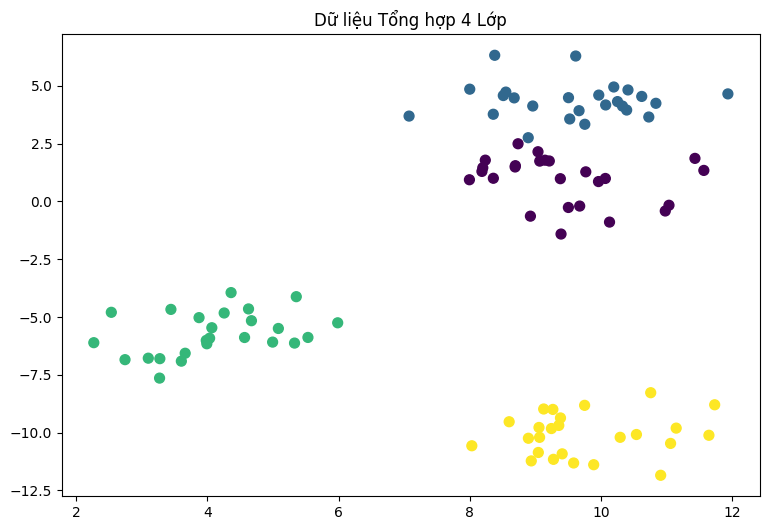


2. Phân bố tập Test (25% dữ liệu):


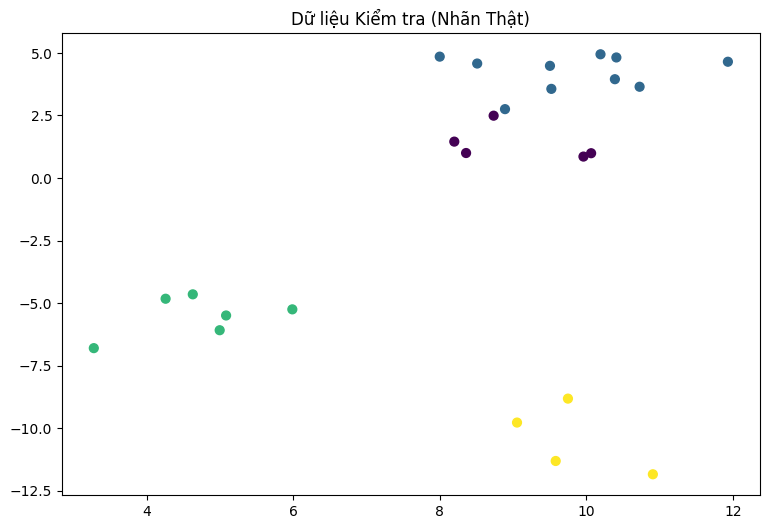


3. Đánh giá thủ công K=5:


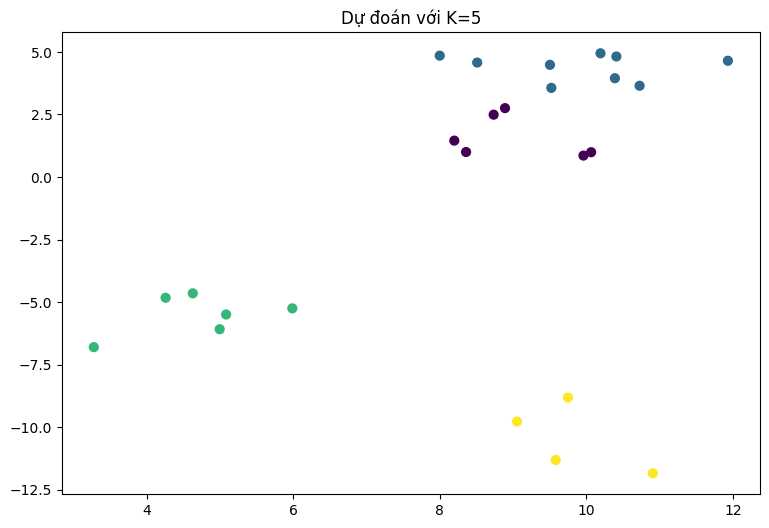


4. Đánh giá thủ công K=1:


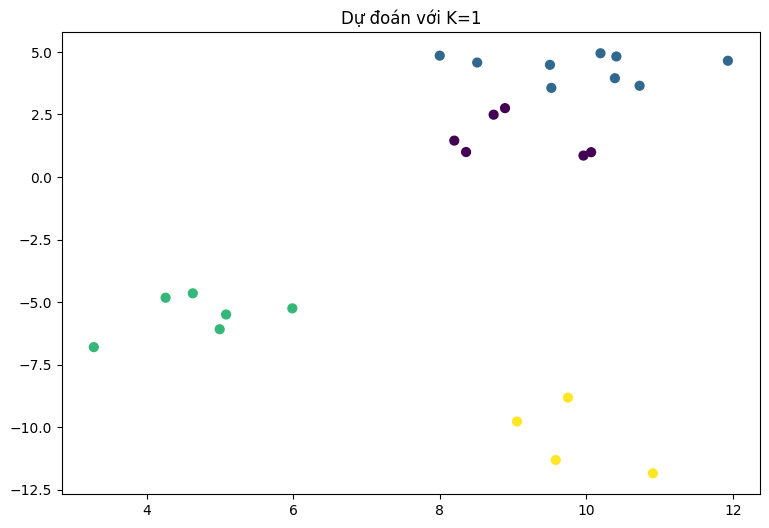


5. Tìm K Tối Ưu bằng GridSearchCV:
Giá trị K tối ưu tìm được qua GridSearchCV: K = 2

6. Dự đoán nhãn bằng hàm KNN tự cài đặt (K=3):
Điểm cần dự đoán: [1 3]
Nhãn dự đoán là: 0


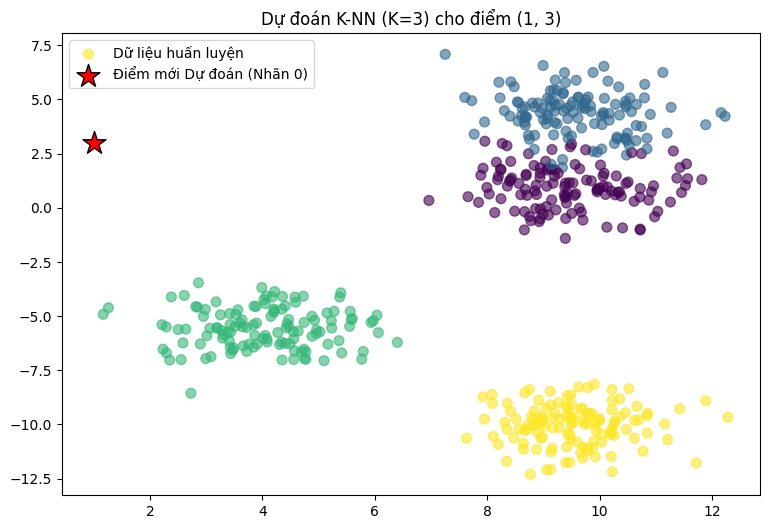

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter

# --- Bước 1 & 2: Khởi tạo Dữ liệu (100 mẫu, 4 lớp) ---
X, y = make_blobs(n_samples=100, n_features=2, centers=4,
                  cluster_std=1, random_state=4)

# --- Bước 3: Xem phân bố Dữ liệu ---
print("1. Phân bố dữ liệu đã tạo:")
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50, cmap='viridis')
plt.title('Dữ liệu Tổng hợp 4 Lớp')
plt.show()


# --- Bước 4: Chia tập dữ liệu ---
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("\n2. Phân bố tập Test (25% dữ liệu):")
plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=40, cmap='viridis')
plt.title('Dữ liệu Kiểm tra (Nhãn Thật)')
plt.show()

# --- Bước 5 & 6: Huấn luyện và Đánh giá thủ công (K=5 và K=1) ---
# K=5
knn5 = KNeighborsClassifier(5)
knn5.fit(X_train, y_train)
y_pred_5 = knn5.predict(X_test)
print("\n3. Đánh giá thủ công K=5:")
plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_5, marker='o', s=40, cmap='viridis')
plt.title('Dự đoán với K=5')
plt.show()

# K=1
knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
y_pred_1 = knn1.predict(X_test)
print("\n4. Đánh giá thủ công K=1:")
plt.figure(figsize=(9, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1, marker='o', s=40, cmap='viridis')
plt.title('Dự đoán với K=1')
plt.show()

# --- Bước 7 (Phần 2): Tìm K Tối Ưu bằng GridSearchCV ---
print("\n5. Tìm K Tối Ưu bằng GridSearchCV:")

# Thiết lập GridSearchCV để tìm K tốt nhất từ 1 đến 9
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid={'n_neighbors': np.arange(1, 10)},
                        cv=5) # Sử dụng 5-fold cross-validation
knn_grid.fit(X, y)

best_k = knn_grid.best_params_['n_neighbors']
print(f"Giá trị K tối ưu tìm được qua GridSearchCV: K = {best_k}")

# --- Hàm dán nhãn dữ liệu dùng kĩ thuật k-NN (Tự cài đặt) ---

def KNN(X_train, X_test_data, y_train, k):
    """
    Hàm tự cài đặt K-NN để dự đoán nhãn cho X_test_data.
    X_train: Dữ liệu huấn luyện
    X_test_data: Dữ liệu cần dự đoán (có thể là một điểm hoặc nhiều điểm)
    y_train: Nhãn của dữ liệu huấn luyện
    k: Số lượng láng giềng gần nhất
    """

    # Đảm bảo X_test_data là ma trận 2D
    if X_test_data.ndim == 1:
        X_test = X_test_data.reshape(1, -1)
    else:
        X_test = X_test_data

    num_test = X_test.shape[0]
    results = []

    for i in range(num_test):
        # Tính khoảng cách Euclidean từ điểm test thứ i đến tất cả điểm trong tập train
        distances = np.sqrt(np.sum(np.power(X_train - X_test[i, :], 2), axis=1))

        # Kết hợp khoảng cách với nhãn, sắp xếp và lấy k láng giềng gần nhất
        # zip(distances, y_train) tạo cặp (khoảng cách, nhãn)
        # sorted(..., key=lambda x: x[0]) sắp xếp theo khoảng cách

        zipped = zip(distances, y_train)
        res = sorted(zipped, key=lambda x: x[0])
        results_topk = res[:k]

        # Lấy nhãn của k láng giềng
        k_neighbor_labels = [label for _, label in results_topk]

        # Bỏ phiếu đa số (Tìm nhãn xuất hiện nhiều nhất)
        # Counter đếm số lần xuất hiện của mỗi nhãn
        # most_common(1) trả về nhãn phổ biến nhất và số lần xuất hiện
        most_common_label = Counter(k_neighbor_labels).most_common(1)[0][0]

        results.append(most_common_label)

    return np.array(results)

# --- Thực Thi Demo với Hàm KNN Tự Cài Đặt ---
# Dữ liệu lớn hơn để minh họa
(X_full, y_full) = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=4)
X_test_point = np.array([(1, 3)]) # Điểm dữ liệu mới cần dự đoán
k_used = 3 # Sử dụng k=3 theo ví dụ của bạn

predicted_result = KNN(X_full, X_test_point, y_full, k_used)

print(f"\n6. Dự đoán nhãn bằng hàm KNN tự cài đặt (K={k_used}):")
print(f"Điểm cần dự đoán: {X_test_point[0]}")
print(f"Nhãn dự đoán là: {predicted_result[0]}")

# --- Trực quan hóa kết quả dự đoán điểm mới ---
plt.figure(figsize=(9, 6))
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, marker='o', s=50, alpha=0.6, cmap='viridis', label='Dữ liệu huấn luyện')
plt.scatter(X_test_point[0, 0], X_test_point[0, 1], marker='*', s=300, c='red', edgecolor='black', label=f'Điểm mới Dự đoán (Nhãn {predicted_result[0]})')
plt.title(f'Dự đoán K-NN (K={k_used}) cho điểm ({X_test_point[0, 0]}, {X_test_point[0, 1]})')
plt.legend()
plt.show()

Tổng số điểm dữ liệu: 500. Số lớp/cụm: 4


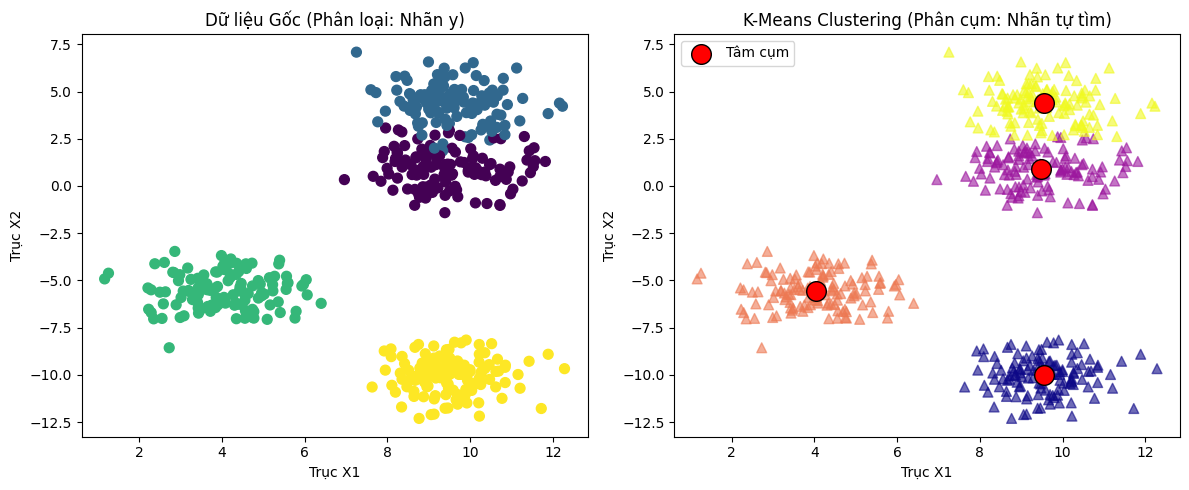


--- K-MEANS CLUSTERING ---
Tâm cụm K-Means tìm được:
[[  9.54 -10.03]
 [  9.48   0.87]
 [  4.04  -5.56]
 [  9.55   4.37]]
Mục đích: Phân nhóm dữ liệu thành các cụm tương đồng.


Dữ liệu Huấn luyện: 350 mẫu, Dữ liệu Kiểm tra: 150 mẫu
Giá trị K tối ưu cho K-NN (dựa trên Cross-Validation): K = 1
Độ chính xác trên tập kiểm tra với K=1: 0.9667
Mục đích: Dự đoán nhãn (class) của dữ liệu mới dựa trên dữ liệu đã gán nhãn.


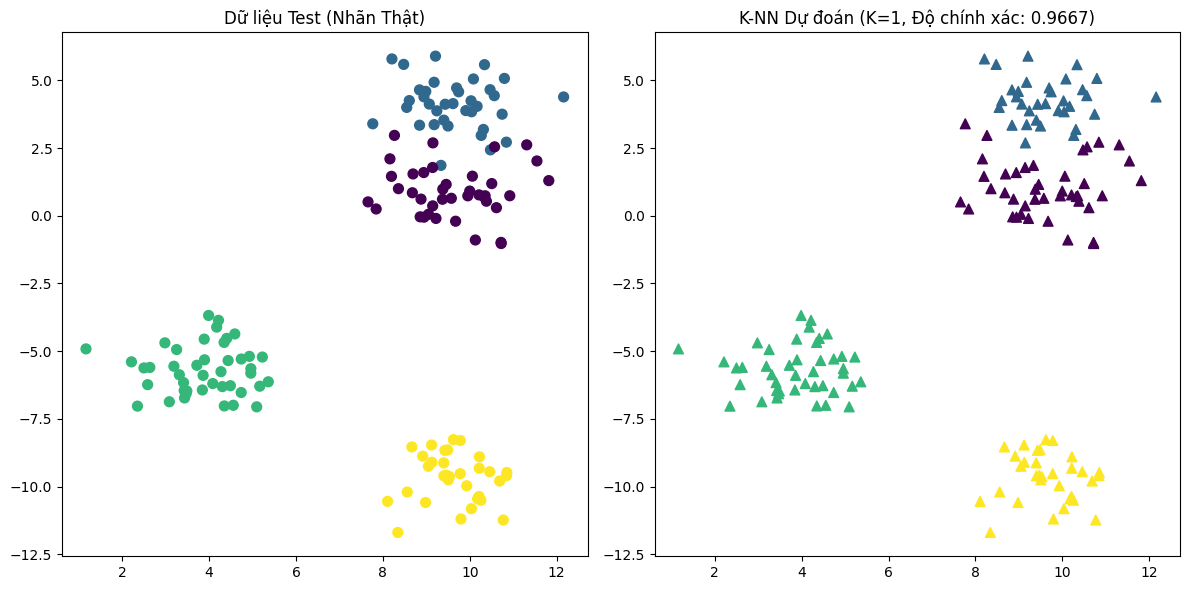

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# --- 1. Tạo Dữ Liệu Mô Phỏng (4 lớp) ---
N_SAMPLES = 500
N_CLUSTERS = 4
RANDOM_STATE = 4

# Dữ liệu được tạo ra với nhãn 'y' đã biết (dành cho K-NN)
X, y = make_blobs(n_samples=N_SAMPLES, n_features=2, centers=N_CLUSTERS,
                  cluster_std=1.0, random_state=RANDOM_STATE)

print(f"Tổng số điểm dữ liệu: {X.shape[0]}. Số lớp/cụm: {N_CLUSTERS}")

# --- 2. Trực Quan Hóa Dữ Liệu Gốc (Sử dụng nhãn y đã biết) ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50, cmap='viridis')
plt.title('Dữ liệu Gốc (Phân loại: Nhãn y)')
plt.xlabel('Trục X1')
plt.ylabel('Trục X2')


# =========================================================
#             PHẦN 1: K-MEANS CLUSTERING (Unsupervised)
# =========================================================

# --- 3. Áp dụng K-Means ---
# Mục tiêu: K-Means cố gắng tìm các cụm tự nhiên trong dữ liệu, không cần nhãn 'y'
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', n_init=10, random_state=RANDOM_STATE)
kmeans.fit(X)

# Lấy nhãn và tâm cụm mà K-Means tìm được
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# --- 4. Trực Quan Hóa Kết Quả K-Means ---
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, marker='^', s=50, cmap='plasma', alpha=0.6)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='o', s=200,
            c='red', edgecolors='black', label='Tâm cụm')
plt.title('K-Means Clustering (Phân cụm: Nhãn tự tìm)')
plt.xlabel('Trục X1')
plt.ylabel('Trục X2')
plt.legend()
plt.tight_layout()
plt.show()
print("\n--- K-MEANS CLUSTERING ---")
print(f"Tâm cụm K-Means tìm được:\n{kmeans_centers.round(2)}")
print("Mục đích: Phân nhóm dữ liệu thành các cụm tương đồng.")

print("\n" + "="*50 + "\n")

# =========================================================
#             PHẦN 2: K-NN CLASSIFIER (Supervised)
# =========================================================

# --- 5. Chuẩn bị Dữ liệu cho K-NN (Tách Train/Test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print(f"Dữ liệu Huấn luyện: {X_train.shape[0]} mẫu, Dữ liệu Kiểm tra: {X_test.shape[0]} mẫu")

# --- 6. Tìm K Tối Ưu cho K-NN bằng Cross-Validation ---
# Kiểm tra K từ 1 đến 15
k_range = range(1, 16)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Tính điểm chính xác (accuracy) bằng 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Giá trị K tối ưu cho K-NN (dựa trên Cross-Validation): K = {optimal_k}")

# --- 7. Huấn luyện và Đánh giá K-NN với K Tối Ưu ---
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred = knn_optimal.predict(X_test)
accuracy = np.mean(y_pred == y_test)

print(f"Độ chính xác trên tập kiểm tra với K={optimal_k}: {accuracy:.4f}")
print("Mục đích: Dự đoán nhãn (class) của dữ liệu mới dựa trên dữ liệu đã gán nhãn.")

# --- 8. Trực Quan Hóa Kết Quả Phân Loại K-NN ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=50, cmap='viridis')
plt.title('Dữ liệu Test (Nhãn Thật)')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='^', s=50, cmap='viridis')
plt.title(f'K-NN Dự đoán (K={optimal_k}, Độ chính xác: {accuracy:.4f})')
plt.tight_layout()
plt.show()